In [205]:
#######DB instance identifier - database-1
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import re
import numpy as np
import ktrain
from ktrain import text
username = 'admin'
password = 'Motorola1!'
import torch
import seaborn as sns
hostname = 'database-1.cy336eho3jm2.us-east-2.rds.amazonaws.com'
port = 3306



db = pymysql.connect(host=hostname, user=username, password=password)

cursor = db.cursor()



db_data = 'mysql+pymysql://' + 'admin' + ':' + 'Motorola1!' + '@' + 'database-1.cy336eho3jm2.us-east-2.rds.amazonaws.com' + ':3306/' \
       + 'wsb' + '?charset=utf8mb4'
engine = create_engine(db_data)







In [206]:
sql50 = '''use wsb'''
cursor.execute(sql50)

0

In [207]:
#### Example Date Extraction - df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-21 06:00:00' and comment_date <= '2021-01-21 06:23:39'", con=engine)



In [208]:
df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-25 09:00:00' and comment_date <= '2021-01-25 20:00:00'", con=engine)



In [209]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)



print(df)



       comment_id comment_parent_id  \
0       gkpgpj7    t1_gkpgo9f         
1       gkpgpjt    t1_gkpg7rk         
2       gkpgpkg    t1_gkpg5dk         
3       gkpgpkn    t3_l4lmrx          
4       gkpgpkt    t3_l4lmrx          
...         ...          ...          
268900  gkr7463    t3_l4xje1          
268901  gkr7466    t1_gkr6mry         
268902  gkr746x    t1_gkr6gk0         
268903  gkr7476    t1_gkr4j4e         
268904  gkr747d    t1_gkr7132         

                                                                                                                                                                                                                                                                    comment_body  \
0       These are rookie numbers                                                                                                                                                                                                                               

In [210]:
stock_symbols = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']
 

def matcher(x):
    for i in stock_symbols:
        if i.lower() in x.lower():
            return i.upper()
    else:
        return np.nan

df['ticker'] = df['comment_body'].apply(matcher)

print(df.ticker.sample(50))

184522    NaN
256931    BAC
142155    NaN
230147    NaN
214624    NaN
126568    NaN
193549    NaN
209920    NaN
234688    BB 
47752     NaN
219928    NaN
248476    NaN
120265    NaN
211526    NaN
154004    NaN
82246     NaN
11856     NaN
238323    MU 
215404    DIS
243751    NaN
214340    NaN
204152    NaN
124479    NaN
179268    MU 
259538    NaN
163936    NaN
100745    NaN
82113     NaN
33951     NaN
208044    GME
165431    NaN
53342     GME
264508    NaN
204186    NaN
70551     NaN
163845    AMC
36188     GME
263229    NaN
232707    NaN
92599     NaN
151219    GME
19701     GME
51984     GME
142655    NaN
48781     GME
44430     BB 
146670    NaN
151779    NaN
136451    NaN
126293    NaN
Name: ticker, dtype: object


In [211]:
df = df.dropna()
df['hour'] = df['comment_date'].dt.hour



df2 = df.groupby(['ticker','hour'], as_index=False).comment_body.count()

df3 = df2.sort_values(by=['hour', 'comment_body'], ascending=[True, False])

df3.rename(columns = {'comment_body': 'comment_count'}, inplace = True)
df3.set_index('ticker')

df3.reset_index()


,index,ticker,hour,comment_count
0,74,BB,9,1801
1,118,GME,9,1417
2,325,SQ,9,565
3,170,MU,9,553
4,66,BAC,9,522
5,224,PLTR,9,386
6,200,NOK,9,324
7,359,UAL,9,272
8,27,AMC,9,228
9,94,DIS,9,143


In [212]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()


In [234]:
tickers = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'li', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']

dataset = yf.download(tickers, start="2021-01-25", end="2021-01-26", interval="60m")

dataset.columns

[*********************100%***********************]  65 of 65 completed


MultiIndex([('Adj Close',  'AAL'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABNB'),
            ('Adj Close',  'ACB'),
            ('Adj Close',  'AMC'),
            ('Adj Close',  'AMD'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'ARKK'),
            ('Adj Close', 'BABA'),
            ('Adj Close',  'BAC'),
            ...
            (   'Volume', 'SRNE'),
            (   'Volume',  'TGT'),
            (   'Volume', 'TLRY'),
            (   'Volume', 'TSLA'),
            (   'Volume', 'TWTR'),
            (   'Volume',  'UAL'),
            (   'Volume', 'UBER'),
            (   'Volume',  'WMT'),
            (   'Volume', 'XPEV'),
            (   'Volume',   'ZM')],
           length=390)

### Price Data

In [214]:
dataset10 = dataset.unstack(level='Datetime')


dataset10.index.names = ['Description','ticker', 'date']

df50 = pd.DataFrame(dataset10)

df51 = df50.rename(columns={0: "price"})

df52 = df51.reset_index()



df52['hour'] = df52['date'].dt.hour

df53 = df52[df52['Description'] == 'Adj Close']

df54 = df53.drop(columns=['Description', 'date'])

display(df54)

,ticker,price,hour
0,AAL,15.430000,9
1,AAL,15.180000,10
2,AAL,15.230000,11
3,AAL,15.369900,12
4,AAL,15.370100,13
5,AAL,15.370000,14
6,AAL,15.430000,15
7,AAPL,144.229996,9
8,AAPL,141.220001,10
9,AAPL,141.190002,11


In [ ]:

tickersmerged = df3.merge(df54, how='left', on=['hour', 'ticker'])

tickersmergedsorted = tickersmerged.sort_values('comment_count', ascending=False)


display(tickersmergedsorted)

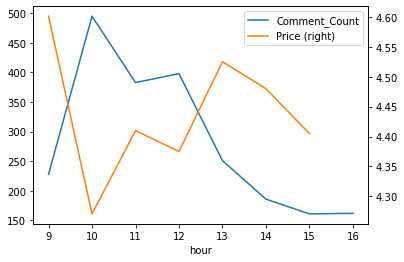

In [245]:
def plotticker(stockticker):

    new = tickersmergedsorted[tickersmergedsorted['ticker'] == stockticker]



    new1 = new.set_index('hour')
    new1 = new1.sort_values('hour', ascending=False)
    new1.comment_count.plot(label="Comment_Count", legend=True)
    new1.price.plot(secondary_y=True, label="Price", legend=True)


plotticker('AMC')

### Volume Data

In [242]:
dataset20 = dataset.unstack(level='Datetime')


dataset20.index.names = ['Description','ticker', 'date']

df500 = pd.DataFrame(dataset10)

df501 = df500.rename(columns={0: "Volume"})

df502 = df501.reset_index()



df502['hour'] = df502['date'].dt.hour

df503 = df502[df502['Description'] == 'Volume']

df504 = df503.drop(columns=['Description', 'date'])

tickersmerged1 = df3.merge(df504, how='left', on=['hour', 'ticker'])

tickersmergedsorted1 = tickersmerged1.sort_values('comment_count', ascending=False)

tickersmergedsorted1.columns

Index(['ticker', 'hour', 'comment_count', 'Volume'], dtype='object')

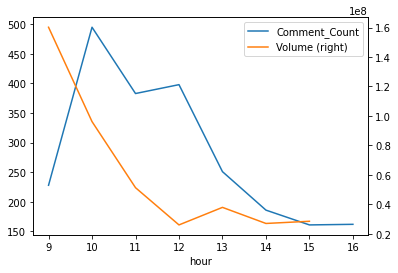

In [244]:
def plottickervolume(stockticker):

    new5 = tickersmergedsorted1[tickersmergedsorted['ticker'] == stockticker]



    new6 = new5.set_index('hour')
    new6 = new6.sort_values('hour', ascending=False)
    new6.comment_count.plot(label="Comment_Count", legend=True)
    new6.Volume.plot(secondary_y=True, label="Volume", legend=True)


plottickervolume('AMC')

In [216]:
### filter out short comments, find a way to take all tickers from text ## installing hugging face 


## set up hugging face model get familiar with it, select 100-200 clean samples from the data, 
### fine tune the model if it is not predicting to my standards
### train fine tuned model on manually labeled data
## go through the finbert paper
### serverless framework for AWS lambdas
###how to make a prediction (new table with sentiment column) 
### implement a logger. Log my logs into a file python if something runs fine send an info log, if something breaks
### warning if something expected happens but doesnt affect file, if something bad happens, catch it and log it with an error
### make sure code continues running (except exception as e 

In [217]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [218]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]
